# Read BicikeLJ data

In [1]:
# Matplotlib inline
%matplotlib inline
# Imports
from urllib.request import urlopen
import json
#import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import datetime
import pytz

Branje podatkov po protokolih, opisanih v: https://developer.jcdecaux.com/#/opendata/vls?page=getstarted

Zanimiva je diplomska naloga: http://geo.ff.uni-lj.si/pisnadela/pdfs/zaksem_201409_ziga_jamnik.pdf

In [2]:
# Parameters
# Station static infos
station_info_url = "https://developer.jcdecaux.com/rest/vls/stations/Ljubljana.json"
# Bycicle, station dynamic infos
station_data_url = "https://api.jcdecaux.com/vls/v1/stations?contract=Ljubljana&apiKey=0a494317d60d3d556d0755600b078ea6b26af90f"
# Station info dataframe
station_fn_ext = ".csv"
station_info_fn = "bicikelj_station_info" + station_fn_ext
station_data_fn = "bicikelj_station_data_" + datetime.datetime.now().strftime('%y%m') + station_fn_ext

In [3]:
station_data_fn

'bicikelj_station_data_1704.csv'

## Station info

In [5]:
response = urlopen(station_data_url)
if response.code == 200:
    data = response.read().decode('utf-8')
else:
    print("Wrong response from ", station_data_url)

In [6]:
response.code

200

In [7]:
station_info_json = json.loads(data)

In [8]:
station_info = pd.DataFrame(station_info_json).sort_values(["number"]).reset_index(drop=True)

In [9]:
station_info.columns

Index(['address', 'available_bike_stands', 'available_bikes', 'banking',
       'bike_stands', 'bonus', 'contract_name', 'last_update', 'name',
       'number', 'position', 'status'],
      dtype='object')

In [10]:
station_info = station_info[['address', 'banking', 'bike_stands', 'bonus', 'name',
                             'number', 'position', 'status']].copy()

In [11]:
station_info = pd.concat([station_info.drop(['position'], axis=1), station_info["position"].apply(pd.Series)], axis=1)
station_info.head()

,address,banking,bike_stands,bonus,name,number,status,lat,lng
0,Prešernov trg 6,False,20,False,PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE,1,OPEN,46.051367,14.506542
1,Pogačarjev trg 3,False,18,False,POGAČARJEV TRG-TRŽNICA,2,OPEN,46.051093,14.507186
2,Kongresni trg 3,False,20,False,KONGRESNI TRG-ŠUBIČEVA ULICA,3,OPEN,46.050388,14.504623
3,Cankarjeva cesta 1,False,26,False,CANKARJEVA UL.-NAMA,4,OPEN,46.052431,14.503257
4,Breg 20,False,20,False,BREG,5,OPEN,46.046498,14.505148


In [12]:
# Save to CSV
station_info.to_csv(station_info_fn, index=True)

## Read station data

In [13]:
response = urlopen(station_data_url)
if response.code == 200:
    data = response.read().decode('utf-8')
else:
    print("Wrong response from ", station_data_url)

In [14]:
station_data_json = json.loads(data)

In [15]:
station_data = pd.DataFrame(station_data_json).sort_values(["number"]).reset_index(drop=True)

In [16]:
station_data.columns

Index(['address', 'available_bike_stands', 'available_bikes', 'banking',
       'bike_stands', 'bonus', 'contract_name', 'last_update', 'name',
       'number', 'position', 'status'],
      dtype='object')

In [17]:
station_data.head()

,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position,status
0,Prešernov trg 6,4,16,False,20,False,Ljubljana,1491302425000,PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE,1,"{'lat': 46.051367, 'lng': 14.506542}",OPEN
1,Pogačarjev trg 3,13,5,False,18,False,Ljubljana,1491302511000,POGAČARJEV TRG-TRŽNICA,2,"{'lat': 46.051093, 'lng': 14.507186}",OPEN
2,Kongresni trg 3,7,13,False,20,False,Ljubljana,1491302447000,KONGRESNI TRG-ŠUBIČEVA ULICA,3,"{'lat': 46.050388, 'lng': 14.504623}",OPEN
3,Cankarjeva cesta 1,9,17,False,26,False,Ljubljana,1491302564000,CANKARJEVA UL.-NAMA,4,"{'lat': 46.052431, 'lng': 14.503257}",OPEN
4,Breg 20,13,7,False,20,False,Ljubljana,1491302296000,BREG,5,"{'lat': 46.046498, 'lng': 14.505148}",OPEN


In [18]:
station_data_real = station_data[['available_bike_stands', 'available_bikes', 'bike_stands',
                                 'last_update', 'number']].copy()

In [19]:
station_data_real["last_update_time"] = pd.to_datetime(station_data_real["last_update"]*1e6)

In [20]:
station_data_real = station_data_real.set_index(["last_update_time"])

In [21]:
station_data_real.drop(["last_update"], 1).sort_index()

,available_bike_stands,available_bikes,bike_stands,number
last_update_time,,,,
2017-03-09 09:02:08,0,1,1,1000
2017-04-04 10:36:52,18,2,20,37
2017-04-04 10:37:06,17,1,18,7
2017-04-04 10:37:19,19,0,20,27
2017-04-04 10:37:39,18,2,20,41
2017-04-04 10:37:59,15,5,20,38
2017-04-04 10:38:08,10,8,18,17
2017-04-04 10:38:10,16,6,22,33
2017-04-04 10:38:14,14,6,20,39


In [22]:
local_tz = pytz.timezone('Europe/Ljubljana')
station_data_real.index = station_data_real.index.tz_localize(pytz.utc).tz_convert(local_tz)

In [23]:
station_data_real.head()

,available_bike_stands,available_bikes,bike_stands,last_update,number
last_update_time,,,,,
2017-04-04 12:40:25+02:00,4,16,20,1491302425000,1
2017-04-04 12:41:51+02:00,13,5,18,1491302511000,2
2017-04-04 12:40:47+02:00,7,13,20,1491302447000,3
2017-04-04 12:42:44+02:00,9,17,26,1491302564000,4
2017-04-04 12:38:16+02:00,13,7,20,1491302296000,5


In [24]:
station_data_full = pd.read_csv(station_data_fn, index_col="last_update_time", parse_dates=True)

In [25]:
station_data_full.head()

,available_bike_stands,available_bikes,bike_stands,number
last_update_time,,,,
2017-03-31 23:49:21,15,4,20,27
2017-03-31 23:49:39,8,0,8,32
2017-03-31 23:50:03,18,0,18,7
2017-03-31 23:50:51,13,7,20,41
2017-03-31 23:50:54,20,0,20,42


In [26]:
type(station_data_full.index[0])

pandas.tslib.Timestamp

In [27]:
added = station_data_full.append(station_data_real).drop_duplicates().sort_index()

SystemError: <class 'TypeError'> returned a result with an error set

In [30]:
len(added)

76

## Analyze station data

In [3]:
station_data_full = pd.read_csv(station_data_fn, index_col="last_update_time")

In [4]:
station_data_full.describe()

,available_bike_stands,available_bikes,bike_stands,number
count,157.000000,157.000000,157.000000,157.000000
mean,13.605096,5.878981,20.114650,16.248408
std,4.701006,4.019743,3.277679,10.184614
min,2.000000,0.000000,8.000000,1.000000
25%,10.000000,2.000000,18.000000,7.000000
50%,14.000000,5.000000,20.000000,16.000000
75%,17.000000,9.000000,21.000000,25.000000
max,24.000000,16.000000,26.000000,38.000000


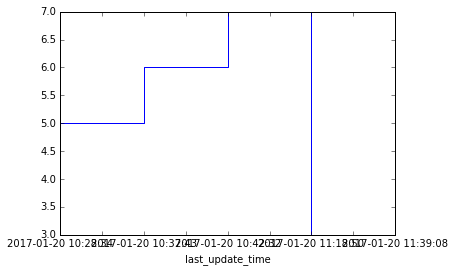

In [5]:
station_data_full[station_data_full["number"] == 3]["available_bike_stands"].plot(linestyle="steps")

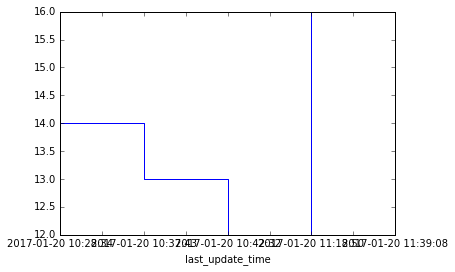

In [6]:
station_data_full[station_data_full["number"] == 3]["available_bikes"].plot(linestyle="steps")

# Convert Time Zone

In [12]:
local_tz = pytz.timezone('Europe/Ljubljana')

In [13]:
station_data_full = pd.read_csv(station_data_fn, index_col="last_update_time", parse_dates=True)
station_data_full.index = station_data_full.index.tz_localize(pytz.utc).tz_convert(local_tz).tz_localize(None)
station_data_full.to_csv(station_data_fn, index=True)

In [14]:
meteo_data_fn = "meteo_data_1701.csv"
meteo_data_full = pd.read_csv(meteo_data_fn, index_col="DateTime", parse_dates=True)
meteo_data_full.index = meteo_data_full.index.tz_localize(pytz.utc).tz_convert(local_tz).tz_localize(None)
meteo_data_full.to_csv(meteo_data_fn, index=True)